In [1]:
from empiricaldist import Pmf

In [2]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [3]:
die = Pmf.from_seq([1, 2, 3, 4, 5, 6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [4]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [5]:
die([1, 4, 7])

array([0.16666667, 0.16666667, 0.        ])

Cookie Problem Revisited

In [6]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [7]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


In [8]:
posterior.normalize()

np.float64(0.625)

In [9]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [10]:
posterior *= likelihood_vanilla #basically a resample yielding the same value
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


In [11]:
likelihood_chocolate = [0.25, 0.5]

In [12]:
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


101 Bowls

In [13]:
import numpy as np

In [14]:
hypos = np.arange(101)

In [15]:
prior = Pmf(1, hypos) #first parameter is prior probability
prior.normalize()

np.int64(101)

In [16]:
prior.head() # all are equally likely

,probs
0,0.009901
1,0.009901
2,0.009901


In [17]:
likelihood_vanilla = hypos / 100 #benefit of 101 bowls
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [18]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


In [25]:
import matplotlib.pyplot as plt

In [26]:
def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    In addition, you can use `legend=False` to suppress the legend.
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')
    """
    loc = options.pop('loc', 'best')
    if options.pop('legend', True):
        legend(loc=loc)

    plt.gca().set(**options)
    plt.tight_layout()

def legend(**options):
    """Draws a legend only if there is at least one labeled item.
    options are passed to plt.legend()
    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
    """
    underride(options, loc='best')

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, **options)
    
def underride(d, **options):
    """Add key-value pairs to d only if key is not in d.

    d: dictionary
    options: keyword args to add to d
    """
    for key, val in options.items():
        d.setdefault(key, val)

    return d

In [27]:
def decorate_bowls(title):
    decorate(xlabel='Bowl #',
             ylabel='PMF',
             title=title)

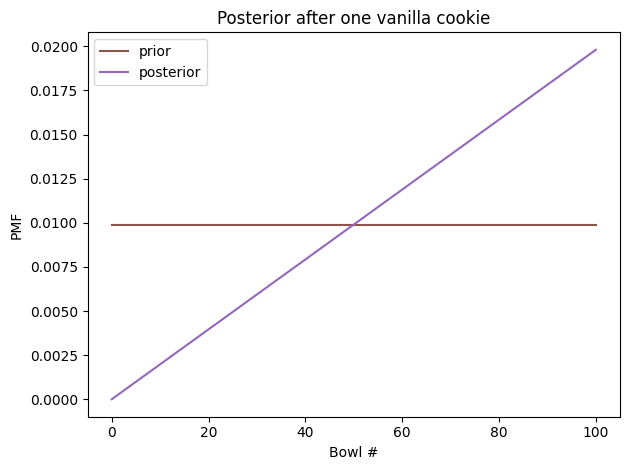

In [28]:
prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')

In [29]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

np.float64(0.6699999999999999)

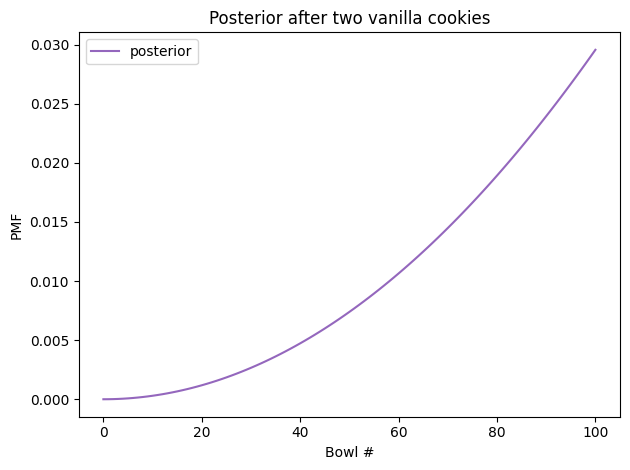

In [30]:
posterior2.plot(label='posterior', color='C4')
decorate_bowls('Posterior after two vanilla cookies')

In [31]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

np.float64(0.2462686567164179)

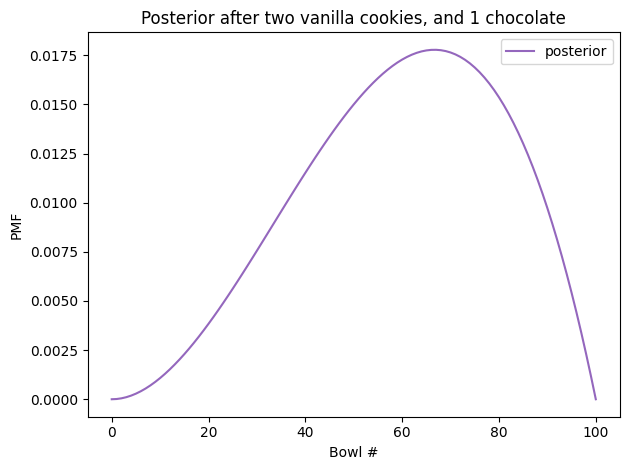

In [32]:
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after two vanilla cookies, and 1 chocolate')

In [37]:
posterior3.idxmax()

np.int64(67)

In [38]:
posterior3.max_prob()

np.int64(67)

Dice Problem

In [39]:
hypos = [6, 8, 12]

In [40]:
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [41]:
prior.qs # quantities

array([ 6,  8, 12])

In [42]:
prior.ps #probabilities

array([0.33333333, 0.33333333, 0.33333333])

In [43]:
likelihood1 = [1/6, 1/8, 1/12]


In [44]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [45]:
likelihood2 = 0, 1/8, 1/12

In [46]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


In [47]:
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = data > hypos
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [48]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [49]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692
